# Freesurfer Hippocampal Subfields

In [1]:
SUBJECTS_DIR = '../tests/subjects'
SUBJECT = 'bert'

In [2]:
import os
from freesurfer_volume_reader.freesurfer import HippocampalSubfieldsVolumeFile

volume_files = list(filter(lambda f: f.subject == SUBJECT, 
                           HippocampalSubfieldsVolumeFile.find(SUBJECTS_DIR)))
sorted(os.path.basename(f.absolute_path) for f in volume_files)

['lh.hippoSfVolumes-T1-T2.v10.txt', 'lh.hippoSfVolumes-T1.v10.txt']

In [3]:
import pandas
volume_frame = pandas.concat([f.read_volumes_dataframe() for f in volume_files])
volume_frame.sort_values(by=['subfield', 'analysis_id']) \
    .reset_index(drop=True).iloc[[0, 1, 3, 5, 8, 13]]

,subfield,volume_mm^3,subject,hemisphere,T1_input,analysis_id
0,CA1,44.567891,bert,left,True,T2
1,CA1,34.567891,bert,left,True,None
3,CA3,678.912345,bert,left,True,None
5,CA4,789.123456,bert,left,True,None
8,HATA,91.244567,bert,left,True,T2
13,Whole_hippocampus,1234.567899,bert,left,True,None


In [4]:
sorted(volume_frame['subfield'].unique())

['CA1',
 'CA3',
 'CA4',
 'GC-ML-DG',
 'HATA',
 'Hippocampal_tail',
 'Whole_hippocampus',
 'fimbria',
 'hippocampal-fissure',
 'molecular_layer_HP',
 'parasubiculum',
 'presubiculum',
 'subiculum']

In [5]:
list(volume_frame['analysis_id'].unique())

[None, 'T2']

In [6]:
def generate_mode_label(row):
    mri_sequences = ['T1' if row['T1_input'] else None,
                     row['analysis_id'].split('_')[0] if row['analysis_id'] else None]
    return ' & '.join(filter(None, mri_sequences))

volume_frame['segmentation_mode'] = volume_frame.apply(generate_mode_label, axis=1)
volume_frame.sort_values(by=['subfield', 'segmentation_mode']) \
    .to_csv('freesurfer_hipposf_volumes_{}.csv'.format(SUBJECT), index=False)
volume_frame['segmentation_mode'].value_counts().sort_index()

T1         13
T1 & T2    13
Name: segmentation_mode, dtype: int64

In [7]:
volume_frame.pivot_table(values='volume_mm^3',
                         index=['subfield', 'hemisphere'],
                         columns='segmentation_mode')

,segmentation_mode,T1,T1 & T2
subfield,hemisphere,,
CA1,left,34.567891,44.567891
CA3,left,678.912345,678.912445
CA4,left,789.123456,789.124456
GC-ML-DG,left,567.891234,567.891244
HATA,left,91.234567,91.244567
Hippocampal_tail,left,123.456789,124.456789
Whole_hippocampus,left,1234.567899,1244.567899
fimbria,left,89.123456,89.124456
hippocampal-fissure,left,345.678912,445.678912


<IPython.core.display.Javascript object>


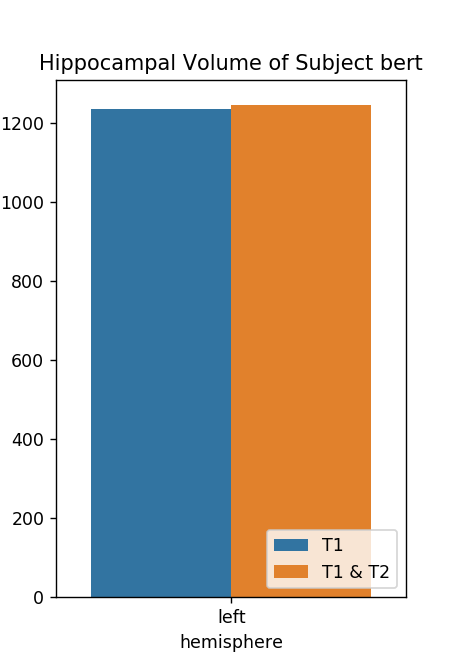

In [8]:
%matplotlib notebook
from matplotlib import pyplot
import seaborn

ax = seaborn.barplot(data=volume_frame[volume_frame['subfield'] == 'Whole_hippocampus'],
                     x='hemisphere',
                     y='volume_mm^3',
                     hue='segmentation_mode')
ax.set_title('Hippocampal Volume of Subject {}'.format(SUBJECT))
ax.legend(loc='lower right');

<IPython.core.display.Javascript object>


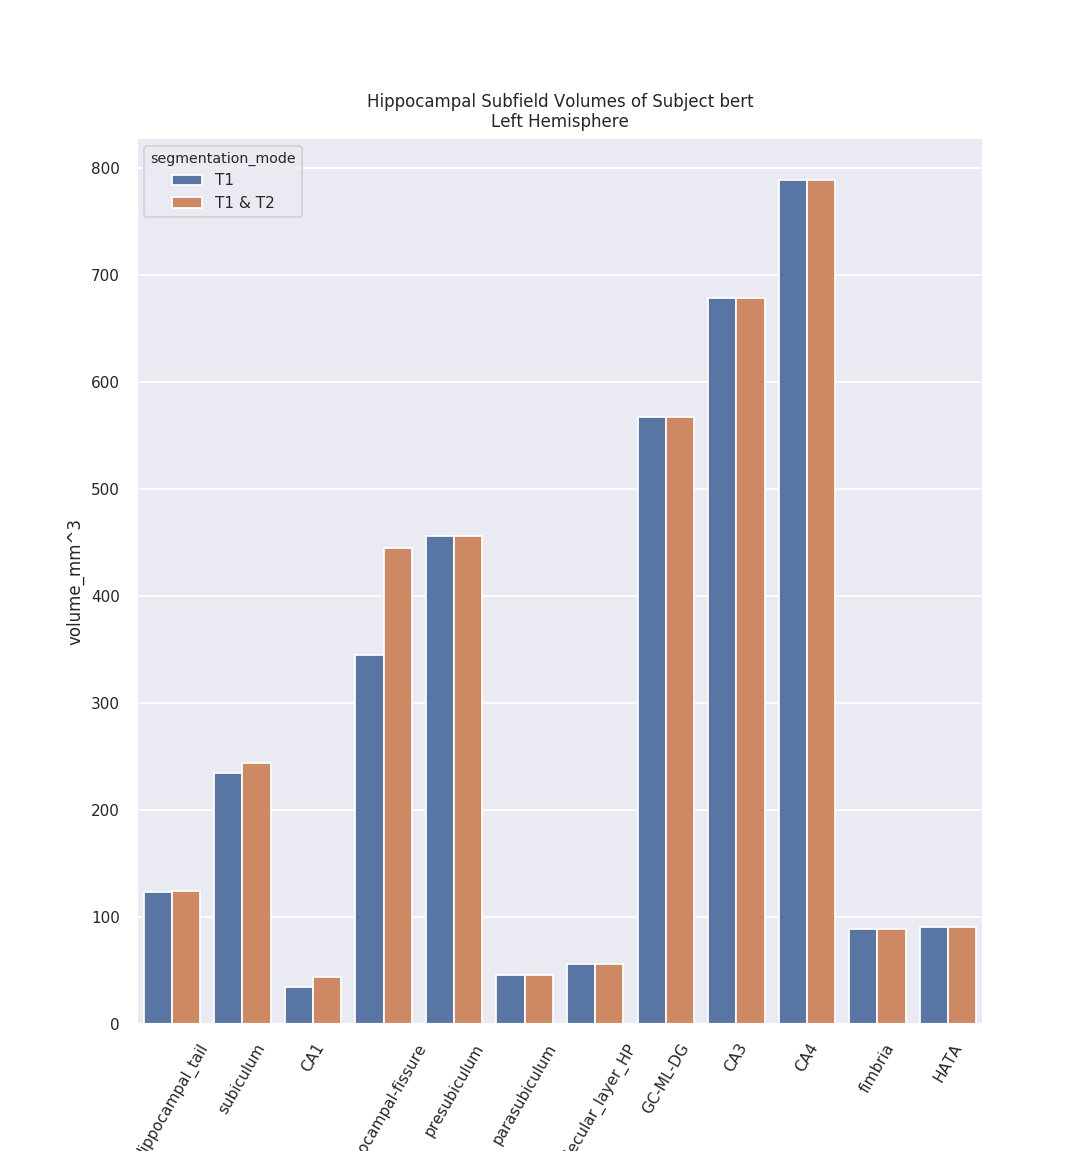

In [9]:
subfield_volume_frame = volume_frame[volume_frame['subfield'] != 'Whole_hippocampus']

pyplot.figure()
seaborn.set(font_scale=0.8)
ax = seaborn.barplot(data=subfield_volume_frame[subfield_volume_frame['hemisphere'] == 'left'],
                     x='subfield',
                     y='volume_mm^3',
                     hue='segmentation_mode')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
ax.set_title('Hippocampal Subfield Volumes of Subject {}\nLeft Hemisphere'.format(SUBJECT));